# Tutorial to use visualisation tools

- use scona visualisation tools to make pretty plots of brain analysis.

This tutorial will go through **the main visualisation functionality** of scona, beginning from producing required inputs to create different figures.

*Note*: Before running this tutorial, please refer to scona/tutorials/introductory_tutorial.ipynb for an introduction about  basic functionality of scona package and structural covariance network analysis in general.

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# threshold G at cost 10 to create a binary graph with 10% as many edges as the complete graph G.
G10 = G.threshold(10)

------------------------------------------------------------------

## *plot_rich_club*
- to plot the rich club values per degree along with the random rich club values created from Random Networks with a preserved degree distribution

Function requries *GraphBundle* object - scona way to handle across-network comparisons. Basically, it is a dictionary, containing *BrainNetwork* objects as values and *strings* (corresponding names of BrainNetwork) as keys.

It is also required to pass the name of the real Graph in GraphBundle (e.g. "Real_Graph") as a string.

Let's create input for the function

In [4]:
# instantiate the GraphBundle object with the BrainNetwork Graph and corresponding name for this Graph

bundleGraphs = scn.GraphBundle([G10], ["Real_Graph"])

This creates a dictionary-like object with BrainNetwork H keyed by 'Real_Graph'. 

In [5]:
bundleGraphs

{'Real_Graph': <scona.classes.BrainNetwork at 0x7f2759a47a58>}

Now add a series of random graphs created by edge swap randomisation of H (keyed by 'Real_Graph').

The *create_random_graphs method* of the GraphBundle class takes in a real network (in our case Real_Graph) and creates a number (10 in the example below) of random graphs. The output is a dictionary of all these graphs.

In [6]:
# Note that 10 is not usually a sufficient number of random graphs to do meaningful analysis,
# it is used here for time considerations
bundleGraphs.create_random_graphs("Real_Graph", 10)

        Creating 10 random graphs - may take a little while


In [7]:
bundleGraphs

{'Real_Graph': <scona.classes.BrainNetwork at 0x7f2759a47a58>,
 'Real_Graph_R0': <scona.classes.BrainNetwork at 0x7f2759ab2f98>,
 'Real_Graph_R1': <scona.classes.BrainNetwork at 0x7f2764f90c50>,
 'Real_Graph_R2': <scona.classes.BrainNetwork at 0x7f27885f2898>,
 'Real_Graph_R3': <scona.classes.BrainNetwork at 0x7f278818a898>,
 'Real_Graph_R4': <scona.classes.BrainNetwork at 0x7f2759a47208>,
 'Real_Graph_R5': <scona.classes.BrainNetwork at 0x7f2759a47400>,
 'Real_Graph_R6': <scona.classes.BrainNetwork at 0x7f27885835c0>,
 'Real_Graph_R7': <scona.classes.BrainNetwork at 0x7f2788583438>,
 'Real_Graph_R8': <scona.classes.BrainNetwork at 0x7f2788583588>,
 'Real_Graph_R9': <scona.classes.BrainNetwork at 0x7f2788583400>}

Well-done! The required input - GraphBundle is created which contains real network keyed by "Real_Graph" and 10 random graphs. Now, let's plot the **rich club coefficient values** of our BrainNetwork Graph and compare real rich club values to random rich club values obtained from 10 random Graphs (stored inside the GraphBundle).   

In [6]:
# import the function to plot rich club values
from scona.visualisations import plot_rich_club

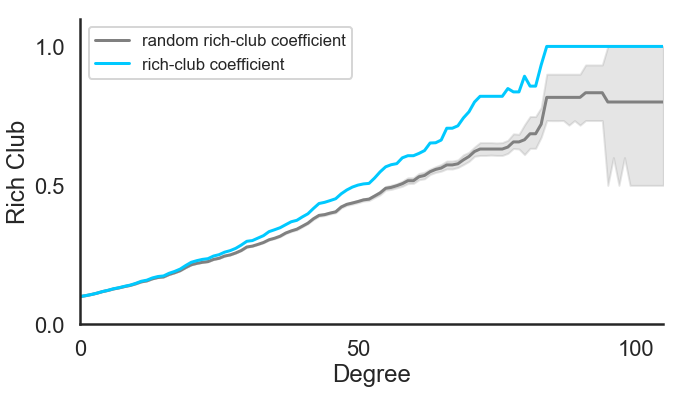

In [7]:
# plot the figure and display without saving to a file
plot_rich_club(bundleGraphs, real_network="Real_Graph")

In [8]:
# show rich club values for degrees from 55 to 65
rich_club_df = bundleGraphs.report_rich_club()
rich_club_df.iloc[55:66, :]

,Real_Graph,Real_Graph_R0,Real_Graph_R1,Real_Graph_R2,Real_Graph_R3,Real_Graph_R4,Real_Graph_R5,Real_Graph_R6,Real_Graph_R7,Real_Graph_R8,Real_Graph_R9
55,0.566783,0.500581,0.494774,0.472706,0.500581,0.480836,0.486643,0.479675,0.477352,0.499419,0.501742
56,0.574390,0.509756,0.501220,0.473171,0.501220,0.482927,0.485366,0.481707,0.480488,0.502439,0.508537
57,0.578205,0.510256,0.511538,0.480769,0.510256,0.488462,0.487179,0.491026,0.488462,0.503846,0.515385
58,0.599099,0.522523,0.513514,0.483483,0.533033,0.490991,0.496997,0.496997,0.490991,0.513514,0.518018
59,0.606723,0.534454,0.527731,0.494118,0.546218,0.500840,0.500840,0.500840,0.505882,0.529412,0.526050
60,0.606723,0.534454,0.527731,0.494118,0.546218,0.500840,0.500840,0.500840,0.505882,0.529412,0.526050
61,0.615054,0.552688,0.535484,0.509677,0.556989,0.505376,0.518280,0.513978,0.522581,0.537634,0.556989
62,0.625287,0.560920,0.547126,0.512644,0.560920,0.503448,0.521839,0.528736,0.519540,0.542529,0.558621
63,0.652422,0.564103,0.561254,0.535613,0.561254,0.521368,0.532764,0.541311,0.532764,0.566952,0.572650
64,0.653333,0.580000,0.570000,0.536667,0.560000,0.543333,0.540000,0.546667,0.540000,0.573333,0.583333


More examples of plotting rich club values:

- save the produced figure in the current directory (where this running python file (or notebook) is located) and set different colors (for real values - #FF4400 - red, for random - #00BBFF - blue).

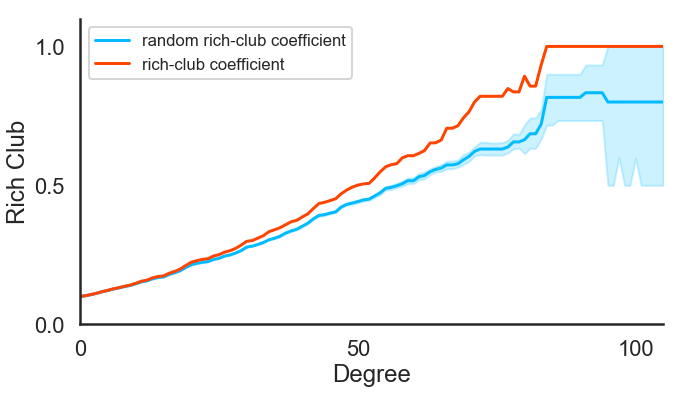

In [9]:
plot_rich_club(bundleGraphs, real_network="Real_Graph",figure_name="Rich_club_values", color=["#FF4400", "#00BBFF"])

- save the produced figure in the location = figure_name and without the legend.

Please, give your own location (path-to_file) to *figure_name* in order to save a figure.

*Note*: if location does not exist, we will notify you and try to automatically create necessary directories.

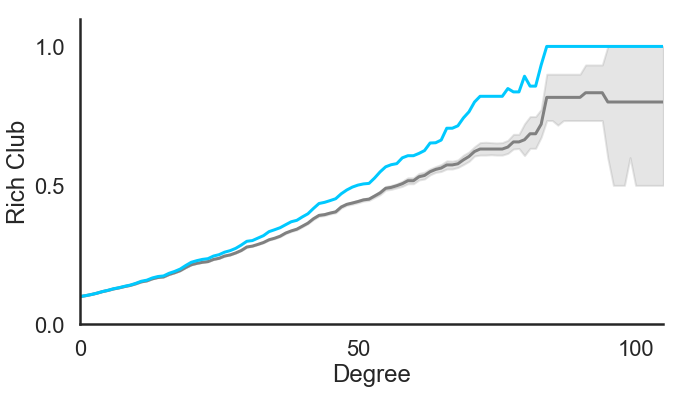

/home/pilot/anaconda3/lib/python3.6/site-packages/scona/helpers.py:25: UserWarning: The path - /home/pilot/GSoC/mynewdir1/Rich_Club_Values does not exist. But we will create this directory for you and store the figure there.
  "directory for you and store the figure there.".format(path_name))


In [10]:
plot_rich_club(bundleGraphs, real_network="Real_Graph", figure_name="/home/pilot/GSoC/mynewdir1/Rich_Club_Values", 
               show_legend=False)

* plot rich club values **only for the real network** (BrainNetwork Graph) and set the color to green.

Simply, do not create random graphs in GraphBundle

In [11]:
realGraph = scn.GraphBundle([H], ["Real_Graph"])

In [12]:
realGraph

{'Real_Graph': <scona.classes.BrainNetwork at 0x7fa66f8ce160>}

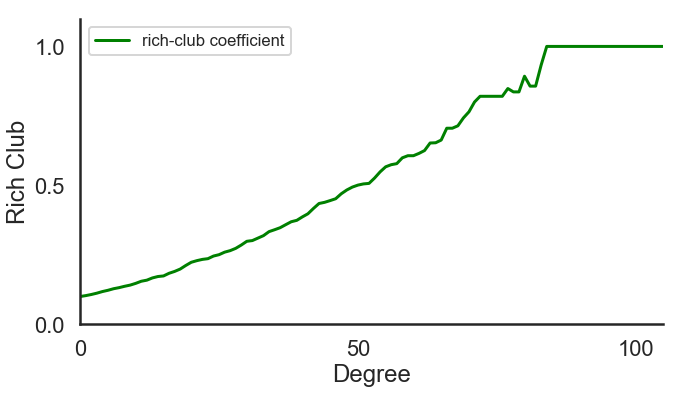

In [14]:
plot_rich_club(realGraph, real_network="Real_Graph", color=["green"])

---------------------------------------------------------

## *plot_network_measures* 
- to plot network measures values (these are attributes of the WHOLE GRAPH) along with the random network values created from random networks

This plotting function requries *GraphBundle* object as input parameter (as well as plot_rich_club). This is a customized scona class which enables us to easily handle internetwork comparisons.

If you are following this tutorial from the begining, you should have already created the *GraphBundle object* which contains 1 real Graph and 10 randomly creadted graphs.

In case you jumped right here to see how to plot network measures, please run the following code to make a required input - *GraphBundle*
```
bundleGraphs = scn.GraphBundle([H], ["Real_Graph"])  
bundleGraphs.create_random_graphs("Real_Graph", 10)
```

In [8]:
bundleGraphs

{'Real_Graph': <scona.classes.BrainNetwork at 0x7f2759a47a58>,
 'Real_Graph_R0': <scona.classes.BrainNetwork at 0x7f2759ab2f98>,
 'Real_Graph_R1': <scona.classes.BrainNetwork at 0x7f2764f90c50>,
 'Real_Graph_R2': <scona.classes.BrainNetwork at 0x7f27885f2898>,
 'Real_Graph_R3': <scona.classes.BrainNetwork at 0x7f278818a898>,
 'Real_Graph_R4': <scona.classes.BrainNetwork at 0x7f2759a47208>,
 'Real_Graph_R5': <scona.classes.BrainNetwork at 0x7f2759a47400>,
 'Real_Graph_R6': <scona.classes.BrainNetwork at 0x7f27885835c0>,
 'Real_Graph_R7': <scona.classes.BrainNetwork at 0x7f2788583438>,
 'Real_Graph_R8': <scona.classes.BrainNetwork at 0x7f2788583588>,
 'Real_Graph_R9': <scona.classes.BrainNetwork at 0x7f2788583400>}

*Note* that 10 is not a sufficient number of random graphs to do meaningful analysis. So let's add 100 more random graphs. (Although, it is better than 10 it is not sufficient to perform publication-ready brain analysis)  
Expect that it will take some time.

In [16]:
# "Real_Graph" is the name of the Real BrainNetwork Graph inside the GraphBundle
# We add a series of random graphs created by edge swap randomisation of H(our BrainNetwork Graph) keyed by 'Real_Graph'

bundleGraphs.create_random_graphs("Real_Graph", 100)

        Creating 100 random graphs - may take a little while


In [9]:
bundleGraphs

{'Real_Graph': <scona.classes.BrainNetwork at 0x7f2759a47a58>,
 'Real_Graph_R0': <scona.classes.BrainNetwork at 0x7f2759ab2f98>,
 'Real_Graph_R1': <scona.classes.BrainNetwork at 0x7f2764f90c50>,
 'Real_Graph_R2': <scona.classes.BrainNetwork at 0x7f27885f2898>,
 'Real_Graph_R3': <scona.classes.BrainNetwork at 0x7f278818a898>,
 'Real_Graph_R4': <scona.classes.BrainNetwork at 0x7f2759a47208>,
 'Real_Graph_R5': <scona.classes.BrainNetwork at 0x7f2759a47400>,
 'Real_Graph_R6': <scona.classes.BrainNetwork at 0x7f27885835c0>,
 'Real_Graph_R7': <scona.classes.BrainNetwork at 0x7f2788583438>,
 'Real_Graph_R8': <scona.classes.BrainNetwork at 0x7f2788583588>,
 'Real_Graph_R9': <scona.classes.BrainNetwork at 0x7f2788583400>}

In [10]:
len(bundleGraphs)

11

Congratulations! 

You created additional 100 random graphs and you managed to answer to some of your emails while waiting.

Now let's calculate global measures for each graph in our GraphBundle object - bundleGraphs.  

These are abbreviations of global measures:  
```
a: assortativity  
C: clustering  
E: efficiency  
L: shortest path  
M: modularity
```

The following method will calculate global measures (if they have not already been calculated) for all of the graphs in bundleGraphs and report the results in a DataFrame.  

*Note*: Calculating 5 diffrent global measures for each graph in GraphBundle (in our case in total 111 graphs) may take a while... and a little more.   

In [11]:
bundleGraphs_measures = bundleGraphs.report_global_measures()

That's official, after waiting for global measures calculations, you could put the characteristic "patient" into your CV.

In [20]:
# see the global measures of the real Graph in GraphBundle

# the real Graph can be accessed by the name associated with it while creating GraphBundle object (e.g."Real_Graph")
bundleGraphs["Real_Graph"].graph["global_measures"]

{'assortativity': 0.09076922258276784,
 'average_clustering': 0.4498887255891581,
 'average_shortest_path_length': 2.376242649858285,
 'efficiency': 0.47983958611582617,
 'modularity': 0.3828553111606414}

In [21]:
# or see the global measures of the Real Graph by using the created dataframe
bundleGraphs_measures.loc["Real_Graph"]

assortativity                   0.090769
average_clustering              0.449889
average_shortest_path_length    2.376243
efficiency                      0.479840
modularity                      0.382855
Name: Real_Graph, dtype: float64

In [22]:
# see the global measures of first 5 records in bundleGraphs_measures dataframe

bundleGraphs_measures.head(5)

,assortativity,average_clustering,average_shortest_path_length,efficiency,modularity
Real_Graph,0.090769,0.449889,2.376243,0.479840,0.382855
Real_Graph_R0,-0.076816,0.229880,2.083020,0.519657,0.120180
Real_Graph_R1,-0.064075,0.236618,2.087038,0.519144,0.121828
Real_Graph_R10,-0.083305,0.217446,2.089428,0.518698,0.129779
Real_Graph_R100,-0.083044,0.238567,2.087144,0.519052,0.130455


Now you have everything to plot **network measures** of the BrainNetwork Graph and compare these measures to random measures values obtained from 110 (in this case) random Graphs (stored inside the GraphBundle). 

In [12]:
# import the function to plot network measures
from scona.visualisations import plot_network_measures

There are 2 required parameters to use plotting function:  
1) GraphBundle object (e.g. bundleGraphs)  
2) string - the name of the real Graph in GraphBundle (e.g. "Real_Graph")

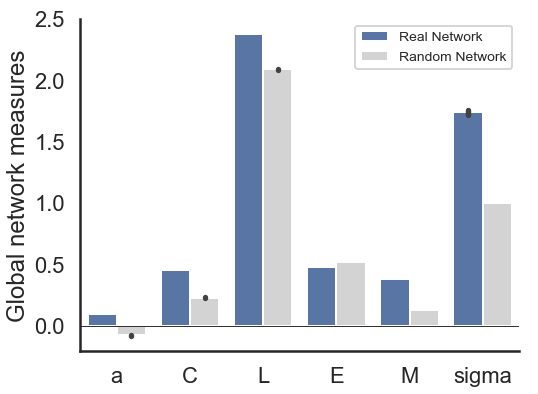

In [13]:
plot_network_measures(bundleGraphs, real_network="Real_Graph")

# these are the default colors and the default value of confidence intervals to draw around random measures = 95

More examples of plotting rich club values:

- save the produced figure in the current directory (where this running python file (or notebook) is located) and set different colors (for real network measures - #FF4400 - red, for measures of random graphs - #00BBFF - blue).

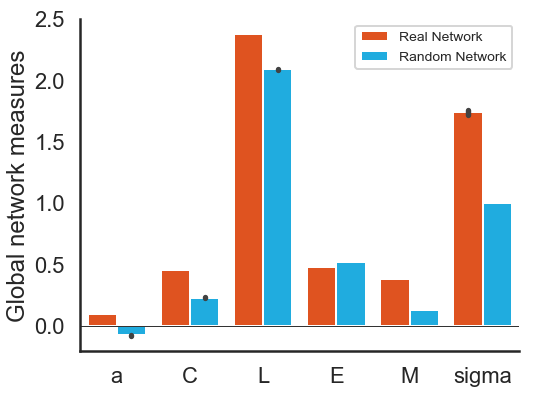

In [14]:
plot_network_measures(bundleGraphs, "Real_Graph", figure_name="Network Measures", color=["#FF4400", "#00BBFF"])

- save the produced figure in the location = figure_name and without the legend.

Please, give your own location (path-to_file) to *figure_name* in order to save a figure.

*Note*: if location does not exist, we will notify you and try to automatically create necessary directories.


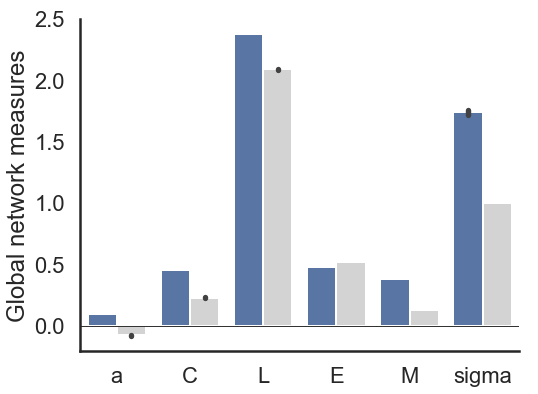

/home/pilot/anaconda3/lib/python3.6/site-packages/scona/visualisations_helpers.py:181: UserWarning: The path - /home/pilot/GSoC/mynewdir2 does not exist. But we will create this directory for you and store the figure there.
  "directory for you and store the figure there.".format(dir_path))


In [15]:
plot_network_measures(bundleGraphs, "Real_Graph", figure_name="/home/pilot/GSoC/mynewdir2/Network_Measures", 
                      show_legend=False)

- plot network measures values **only for the real network** (BrainNetwork Graph) and set the color to green.  

Simply, do not create random graphs in GraphBundle

In [18]:
realGraph = scn.GraphBundle([G10], ["Real_Graph"])

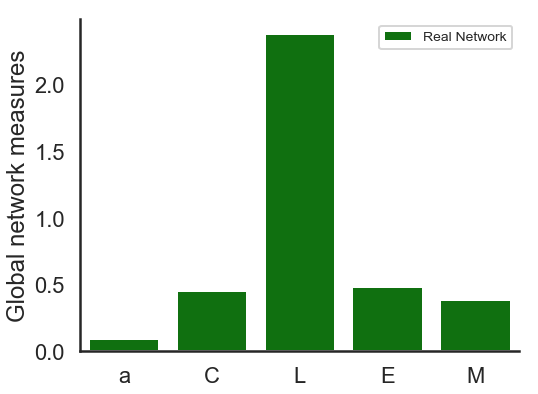

In [19]:
plot_network_measures(realGraph, real_network = "Real_Graph", color=["green"])

** Error bars **  
The variance of measures obtained from random graphs is shown by using the 95% confidence interval (by default ci=95).

- Show error_bars with standard deviation of random measures instead of a confidence interval

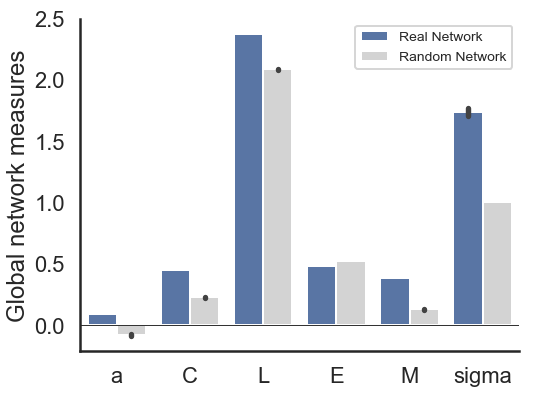

In [20]:
plot_network_measures(bundleGraphs, real_network="Real_Graph", ci="sd")

- plot network measure and set confidence interval to 99

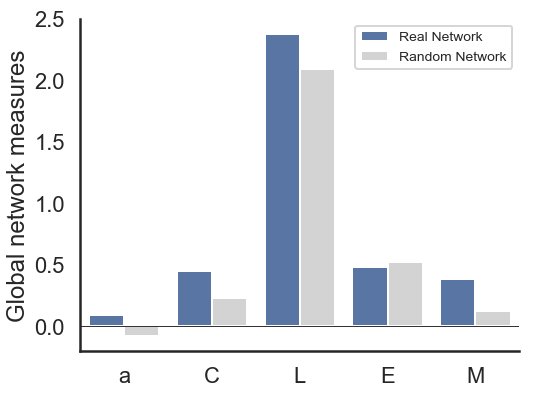

In [30]:
plot_network_measures(bundleGraphs, real_network="Real_Graph", ci=99)

----------------------

## *plot_degree_dist*
- to plot the degree distribution along with the degree distribution of an Erdos Renyi random graph that has the same number of nodes.

Let's see nodes degrees of BrainNetwork Graph. 

The node degree is the number of edges adjacent to the node. The weighted node degree is the sum of the edge weights for edges incident to that node.

In [2]:
degrees = dict(G10.degree())

The degrees is a dict, *keys* - node's number, *value* - degree of node.

In [3]:
degrees

{0: 47,
 1: 55,
 2: 2,
 3: 83,
 4: 95,
 5: 47,
 6: 68,
 7: 24,
 8: 32,
 9: 10,
 10: 18,
 11: 28,
 12: 53,
 13: 66,
 14: 34,
 15: 59,
 16: 40,
 17: 56,
 18: 41,
 19: 55,
 20: 33,
 21: 28,
 22: 24,
 23: 27,
 24: 6,
 25: 48,
 26: 19,
 27: 13,
 28: 48,
 29: 1,
 30: 4,
 31: 43,
 32: 34,
 33: 34,
 34: 80,
 35: 9,
 36: 32,
 37: 84,
 38: 18,
 39: 84,
 40: 24,
 41: 11,
 42: 58,
 43: 35,
 44: 19,
 45: 11,
 46: 3,
 47: 4,
 48: 1,
 49: 20,
 50: 16,
 51: 22,
 52: 5,
 53: 21,
 54: 10,
 55: 17,
 56: 19,
 57: 41,
 58: 3,
 59: 3,
 60: 43,
 61: 18,
 62: 23,
 63: 31,
 64: 21,
 65: 40,
 66: 72,
 67: 62,
 68: 55,
 69: 10,
 70: 6,
 71: 13,
 72: 7,
 73: 46,
 74: 11,
 75: 54,
 76: 13,
 77: 42,
 78: 22,
 79: 17,
 80: 1,
 81: 18,
 82: 14,
 83: 14,
 84: 18,
 85: 64,
 86: 71,
 87: 17,
 88: 46,
 89: 37,
 90: 7,
 91: 38,
 92: 37,
 93: 26,
 94: 29,
 95: 25,
 96: 13,
 97: 8,
 98: 39,
 99: 16,
 100: 80,
 101: 42,
 102: 63,
 103: 35,
 104: 58,
 105: 50,
 106: 47,
 107: 36,
 108: 19,
 109: 32,
 110: 42,
 111: 71,
 112: 

Let's have a look at one example - 125th node.

In [4]:
degrees[125]

63

The 125th node has a degree - 63 which means that there are 63 edges adjacent to 125th node. And the node itself is:

In [5]:
G10.nodes[125]

{'centroids': array([-29.741438, -54.797945,  46.405822]),
 'name': 'lh_superiorparietal_part5',
 'x': -29.741438,
 'y': -54.797945,
 'z': 46.405822}

We need just BrainNetwork Graph to plot the **degree distribution** along with the degree distribution of Erdos Renyi random graph that has the same number of nodes as our BrainNetwork Graph.

In [6]:
# import the function to plot the degree distribution

from scona.visualisations import plot_degree_dist

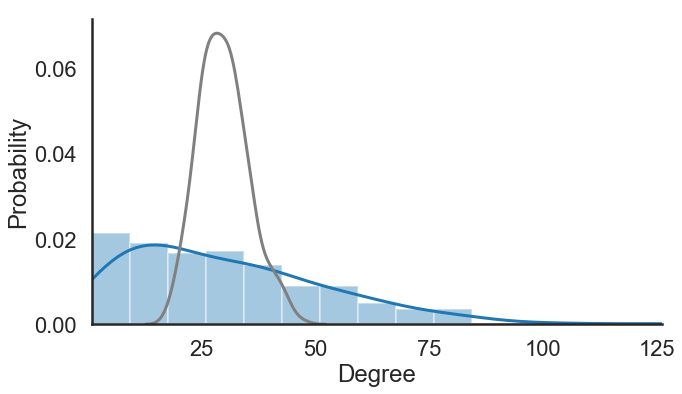

In [7]:
# plot the degree distribution of a Graph along with the degree distribution of Erdos Renyi random graph 

plot_degree_dist(G10)

The Grey Curve is the degree distribution of an Erdos Renyi random graph.

More examples of plotting degree distribution:
- plot the degree distribution without the degree distribution of the Erdős-Rényi graph and save the figure in the current directory (where this running python file (or notebook) is located);

The Erdős-Rényi graph is also called the binomial graph.

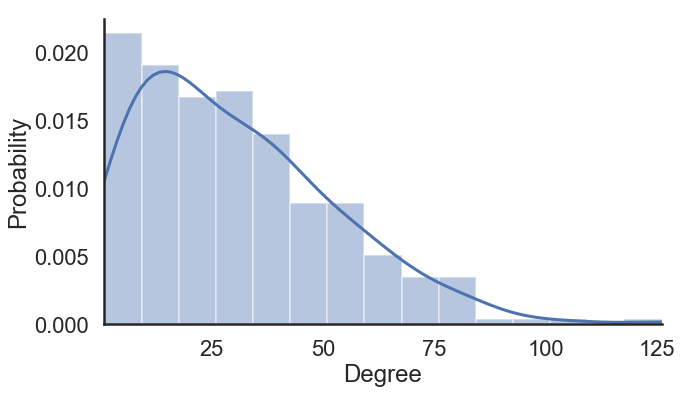

In [8]:
plot_degree_dist(G10, binomial_graph=False, figure_name="Degree Distribution")

- plot the degree distribution with the degree distribution of the Erdős-Rényi graph (by default) and save the figure in any other location - give the full path (string without spaces) as a parameter figure_name;

Please, give your own location (path-to_file) to *figure_name* in order to save a figure.

*Note*: if location does not exist, we will notify you and try to automatically create necessary directories.

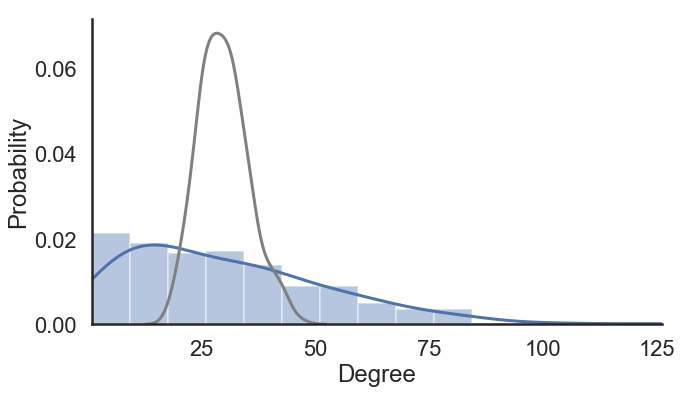

In [9]:
plot_degree_dist(G10, figure_name="figures/AAA")

*Note*: The Grey Curve (the degree distribution of an Erdos Renyi random graph) will not be *exactly* the same, because every time you call the plotting function a new Erdos Renyi random graph is created.

- plot the degree distribution with the degree distribution of the Erdős-Rényi graph (by default), without saving to a file and set your own colors;

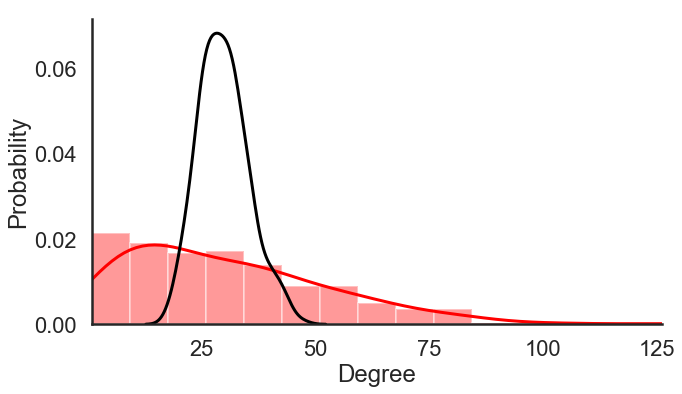

In [15]:
plot_degree_dist(G10, color=["red", "black"], seed=10)

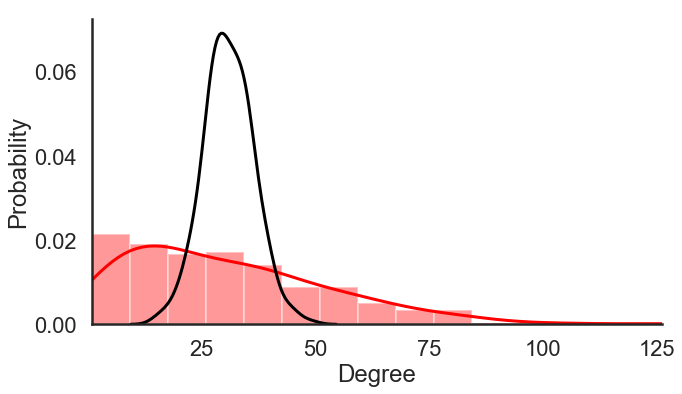

In [17]:
plot_degree_dist(G10, color=["red", "black"], seed=None)

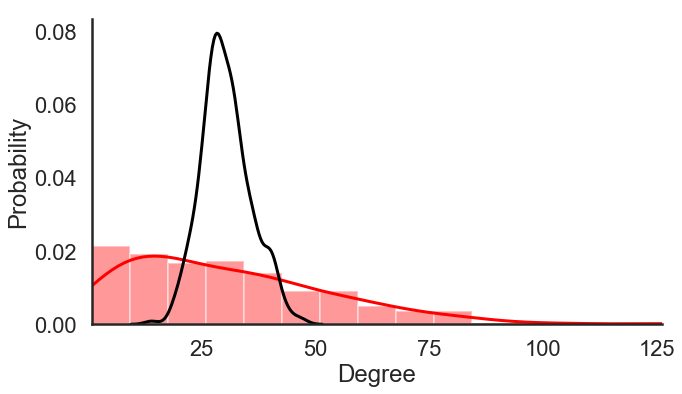

In [19]:
plot_degree_dist(G10, color=["red", "black"], seed=None)

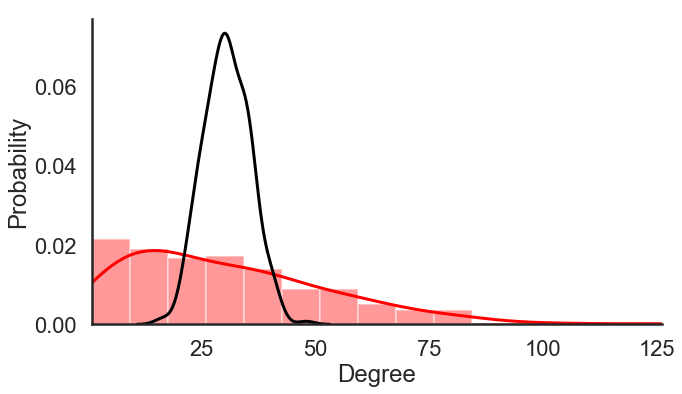

In [24]:
plot_degree_dist(G10, color=["red", "black"], seed=None)

----------------------------------------------------------

In [120]:
H.edges()

EdgeView([(0, 1), (0, 57), (0, 133), (0, 54), (0, 39), (0, 13), (0, 67), (0, 19), (0, 28), (0, 34), (0, 17), (0, 26), (0, 6), (0, 118), (0, 12), (0, 56), (0, 94), (0, 66), (0, 14), (0, 10), (0, 102), (0, 120), (0, 135), (0, 3), (0, 65), (0, 92), (0, 15), (0, 222), (0, 142), (0, 253), (0, 209), (0, 250), (0, 210), (0, 103), (0, 100), (0, 68), (0, 53), (0, 190), (0, 193), (0, 278), (0, 248), (0, 291), (0, 246), (0, 98), (0, 38), (0, 119), (0, 294), (1, 17), (1, 142), (1, 19), (1, 39), (1, 67), (1, 193), (1, 34), (1, 248), (1, 133), (1, 278), (1, 26), (1, 210), (1, 56), (1, 66), (1, 13), (1, 14), (1, 101), (1, 12), (1, 135), (1, 22), (1, 232), (1, 155), (1, 153), (1, 15), (1, 54), (1, 92), (1, 234), (1, 6), (1, 172), (1, 103), (1, 159), (1, 42), (1, 124), (1, 111), (1, 129), (1, 37), (1, 120), (1, 57), (1, 128), (1, 180), (1, 84), (1, 222), (1, 244), (1, 246), (1, 91), (1, 139), (1, 127), (1, 73), (1, 85), (1, 32), (1, 118), (1, 102), (1, 10), (1, 87), (2, 97), (2, 114), (3, 116), (3, 118

In [209]:
edge_list = list(H.edges())

In [210]:
random.shuffle(edge_list)
random.shuffle(edge_list)
random.shuffle(edge_list)

In [214]:
edge_list = edge_list[0:10]

In [215]:
edge_list

[(19, 57),
 (117, 265),
 (105, 221),
 (41, 194),
 (12, 25),
 (104, 264),
 (60, 234),
 (28, 159),
 (278, 283),
 (256, 277)]

In [117]:
Test = G.threshold(2)

In [119]:
Test.graph["centroids"]

True

In [114]:
rc_club_nodes = [0, 100,200,300]

In [115]:
len(rc_club_nodes)

4

In [109]:
# NODE SIZE

In [178]:
node_list = list(G.nodes())

In [179]:
len(node_list)

308

In [180]:
node_size = node_list.copy()

In [181]:
node_size[0] = 500

In [182]:
node_size

[500,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184

In [99]:
import random

random.shuffle(node_size)

In [101]:
len(node_size)

308